# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | port blair
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | tanjung pandan
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | sambava
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | okhotsk
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | galliano
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | katabu
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | bedesa
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | morondava
Processing Record

Processing Record 41 of Set 4 | xilin hot
Processing Record 42 of Set 4 | bressanone
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | ahau
City not found. Skipping...
Processing Record 46 of Set 4 | ponta delgada
Processing Record 47 of Set 4 | deltebre
Processing Record 48 of Set 4 | badger
Processing Record 49 of Set 4 | kailua-kona
Processing Record 0 of Set 5 | necochea
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | mugia
Processing Record 3 of Set 5 | acarau
Processing Record 4 of Set 5 | atafu village
Processing Record 5 of Set 5 | humen
Processing Record 6 of Set 5 | hilo
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | jalai nur
Processing Record 9 of Set 5 | lensk
Processing Record 10 of Set 5 | preobrazheniye
Processing Record 11 of Set 5 | arraial do cabo
Processing Record 12 of Set 5 | xinyuan
Processing Record 13 of Set 5 | arno
Processing Reco

Processing Record 32 of Set 8 | kaa-khem
Processing Record 33 of Set 8 | ayr
Processing Record 34 of Set 8 | key west
Processing Record 35 of Set 8 | greymouth
Processing Record 36 of Set 8 | micheweni
Processing Record 37 of Set 8 | touros
Processing Record 38 of Set 8 | putla villa de guerrero
Processing Record 39 of Set 8 | la'ie
Processing Record 40 of Set 8 | turpan
Processing Record 41 of Set 8 | kuanda
Processing Record 42 of Set 8 | maceio
Processing Record 43 of Set 8 | baruun-urt
Processing Record 44 of Set 8 | tain-l'hermitage
Processing Record 45 of Set 8 | port-cartier
Processing Record 46 of Set 8 | loukhi
Processing Record 47 of Set 8 | yreka
Processing Record 48 of Set 8 | ouricuri
Processing Record 49 of Set 8 | fort mcmurray
Processing Record 0 of Set 9 | mulheim
Processing Record 1 of Set 9 | sydney
Processing Record 2 of Set 9 | cabinda
Processing Record 3 of Set 9 | san rafael del yuma
Processing Record 4 of Set 9 | hargeysa
Processing Record 5 of Set 9 | saint-jos

Processing Record 23 of Set 12 | magumeri
Processing Record 24 of Set 12 | yeghegnadzor
Processing Record 25 of Set 12 | ketchikan
Processing Record 26 of Set 12 | lovington
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,27.62,83,63,7.24,MH,1683847079
1,papatowai,-46.5619,169.4708,10.67,88,100,4.22,NZ,1683847079
2,port blair,11.6667,92.7500,28.32,79,100,9.82,IN,1683847079
3,grytviken,-54.2811,-36.5092,-4.50,74,8,4.37,GS,1683847079
4,taoudenni,22.6783,-3.9836,34.10,10,89,5.01,ML,1683847079


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palmer,42.1584,-72.3287,14.66,82,75,0.00,US,1683521439
1,ribeira grande,38.5167,-28.7000,16.54,96,100,4.02,PT,1683521439
2,ulsteinvik,62.3432,5.8487,11.28,52,32,1.34,NO,1683521439
3,vilyuysk,63.7553,121.6247,-3.99,67,98,2.98,RU,1683521439
4,la passe,45.5549,-0.8967,13.88,91,48,0.43,FR,1683521439


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

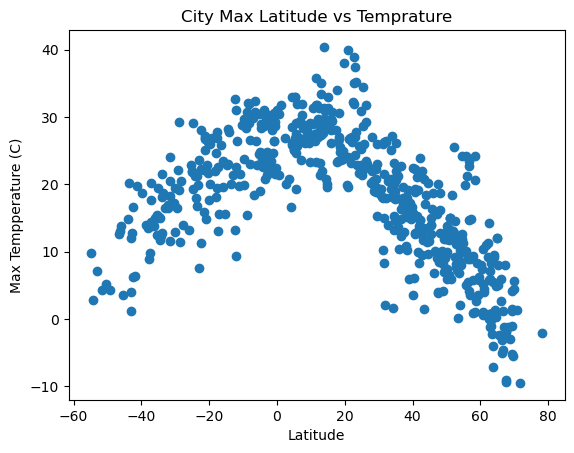

In [22]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Tempperature (C)")
plt.title("City Max Latitude vs Temprature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

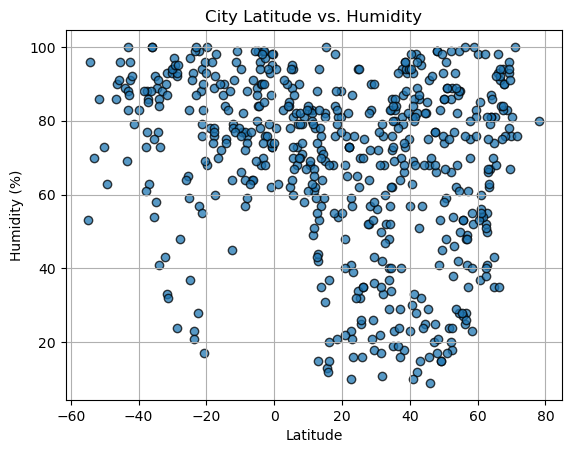

In [23]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

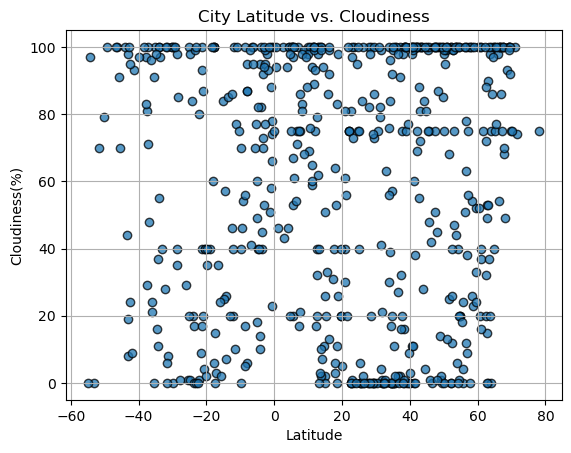

In [27]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

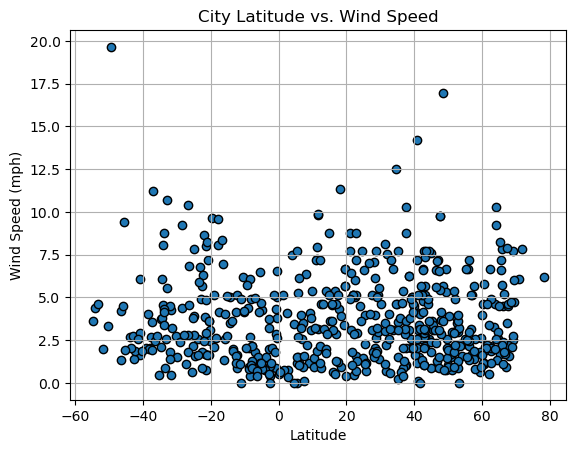

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi = [city for city in city_data if city["Lat"] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,27.62,83,63,7.24,MH,1683847079
1,port blair,11.6667,92.7500,28.32,79,100,9.82,IN,1683847079
2,taoudenni,22.6783,-3.9836,34.10,10,89,5.01,ML,1683847079
3,albany,42.6001,-73.9662,23.36,48,16,4.80,US,1683847056
4,katsuura,35.1333,140.3000,17.32,57,99,3.57,JP,1683847080


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi = [city for city in city_data if city["Lat"] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,10.67,88,100,4.22,NZ,1683847079
1,grytviken,-54.2811,-36.5092,-4.50,74,8,4.37,GS,1683847079
2,tanjung pandan,-2.7500,107.6500,25.71,92,18,1.98,ID,1683847079
3,sambava,-14.2667,50.1667,22.91,88,28,3.53,MG,1683847079
4,punta arenas,-53.1500,-70.9167,8.06,76,75,4.63,CL,1683846741


###  Temperature vs. Latitude Linear Regression Plot

r-squared: 0.6236342316968686


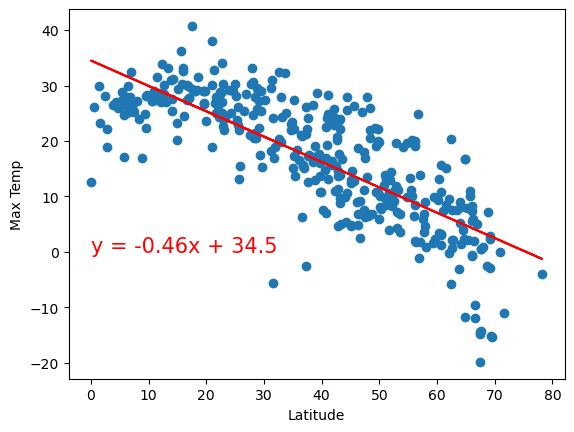

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"r-squared: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

r-squared: 0.6451955367434598


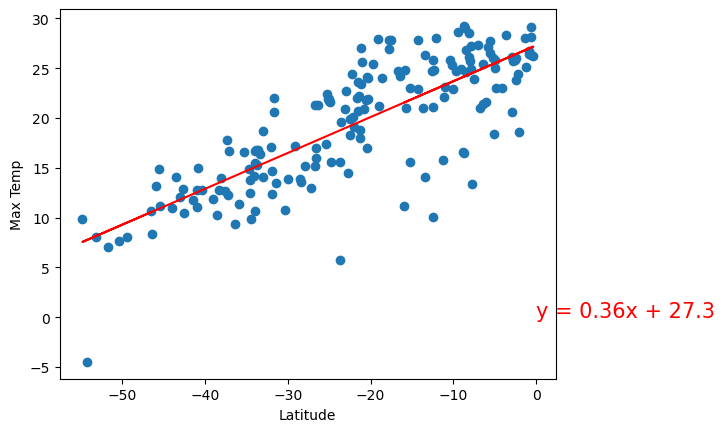

In [21]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"r-squared: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# in north hemisphere, the latitue and temp has positive correction but in south hemisphere, it's negative correction. 

### Humidity vs. Latitude Linear Regression Plot

r-squared: 0.006221434158901884


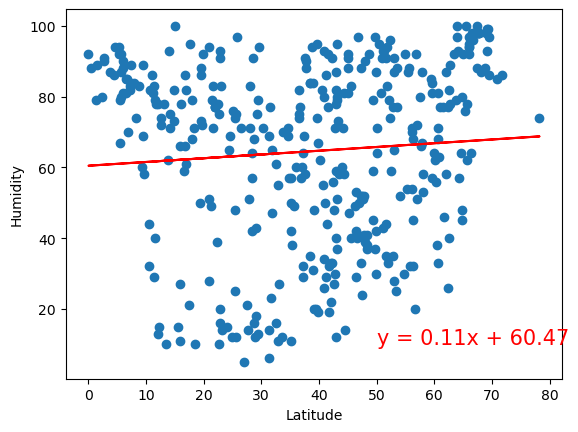

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"r-squared: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

r-squared: 0.05146399858897686


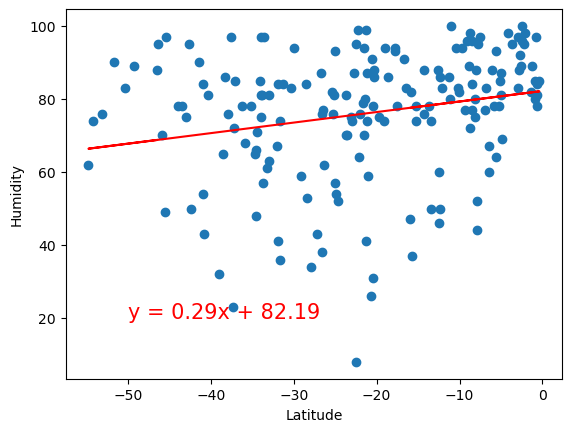

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"r-squared: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#In general, the latitude is not correlated with humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

r-squared: 0.012513068157073896


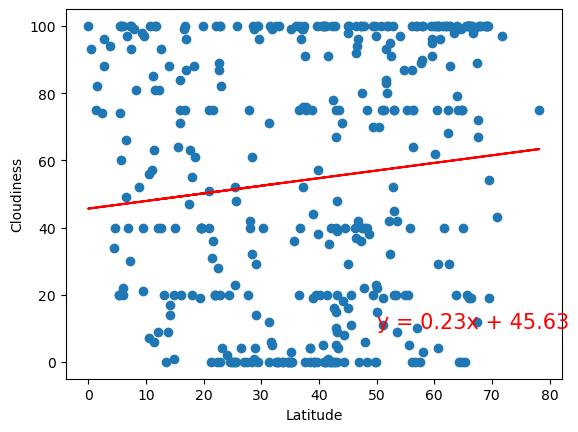

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"r-squared: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

r-squared: 0.00034278031588113044


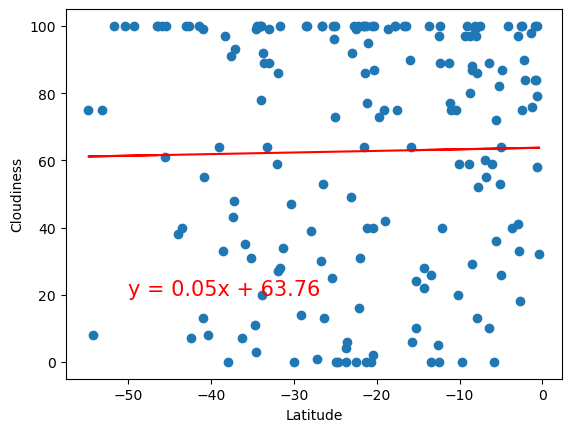

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"r-squared: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#cloudiness and latitude don't have significant correlation

### Wind Speed vs. Latitude Linear Regression Plot

r-squared: 4.9975883901458996e-06


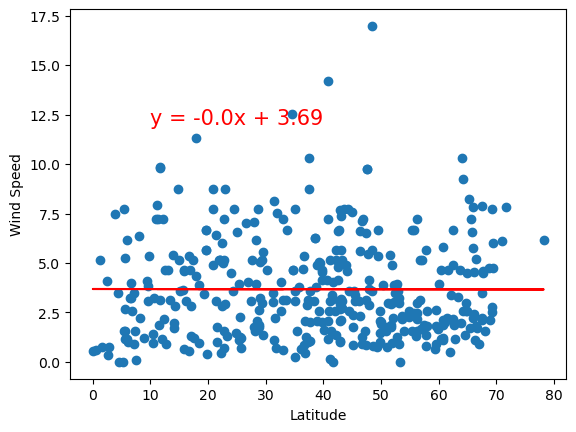

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"r-squared: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

r-squared: 0.041001432118416795


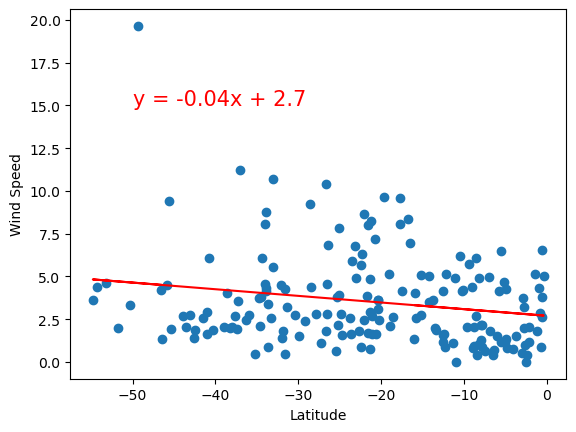

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"r-squared: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Latitude and wind speed do not have significant correlation. 